# Fish Weight Prediction

## Data Loading

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [82]:
df = pd.read_csv("fish.csv")

In [84]:
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
df.shape

(159, 7)

In [9]:
df.size

1113

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [13]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [15]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

## Data Visualization

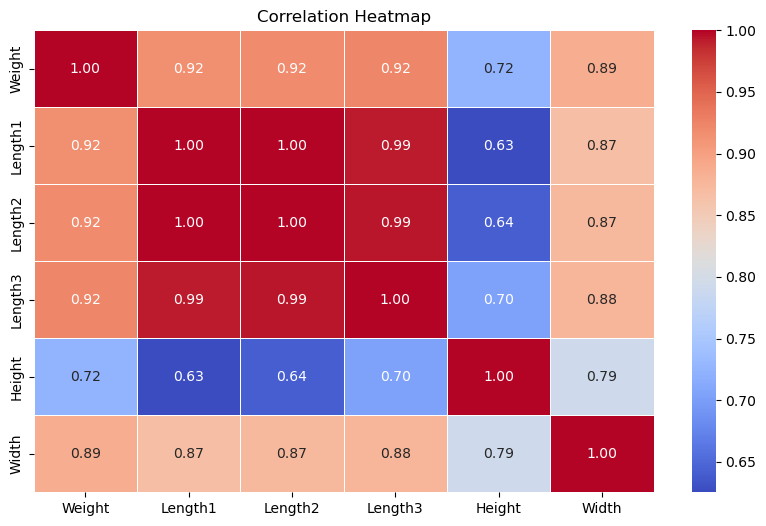

In [56]:
# Heatmap for correlation matrix

plt.figure(figsize=(10, 6))
correlation_matrix = df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

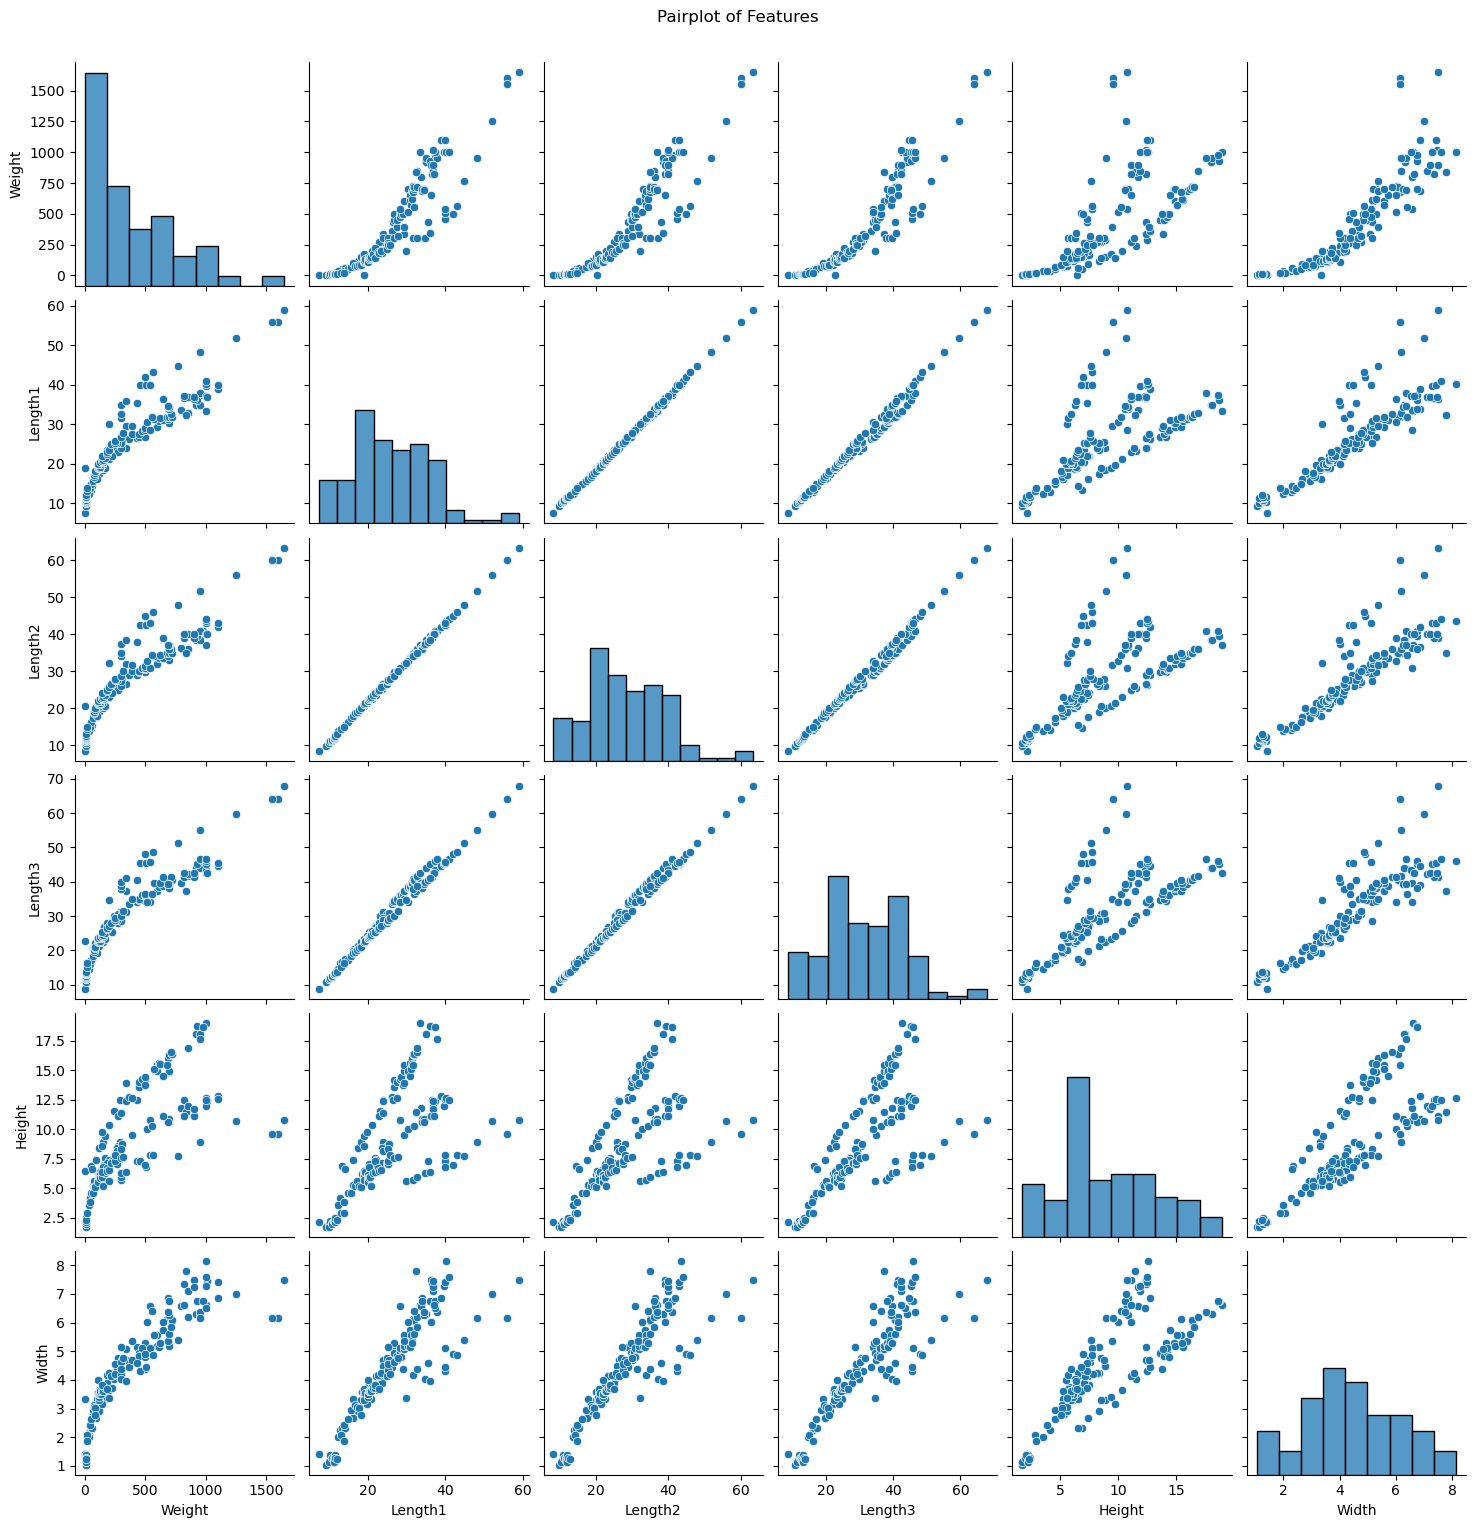

In [58]:
# Pairplot to show relationships between features

sns.pairplot(df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

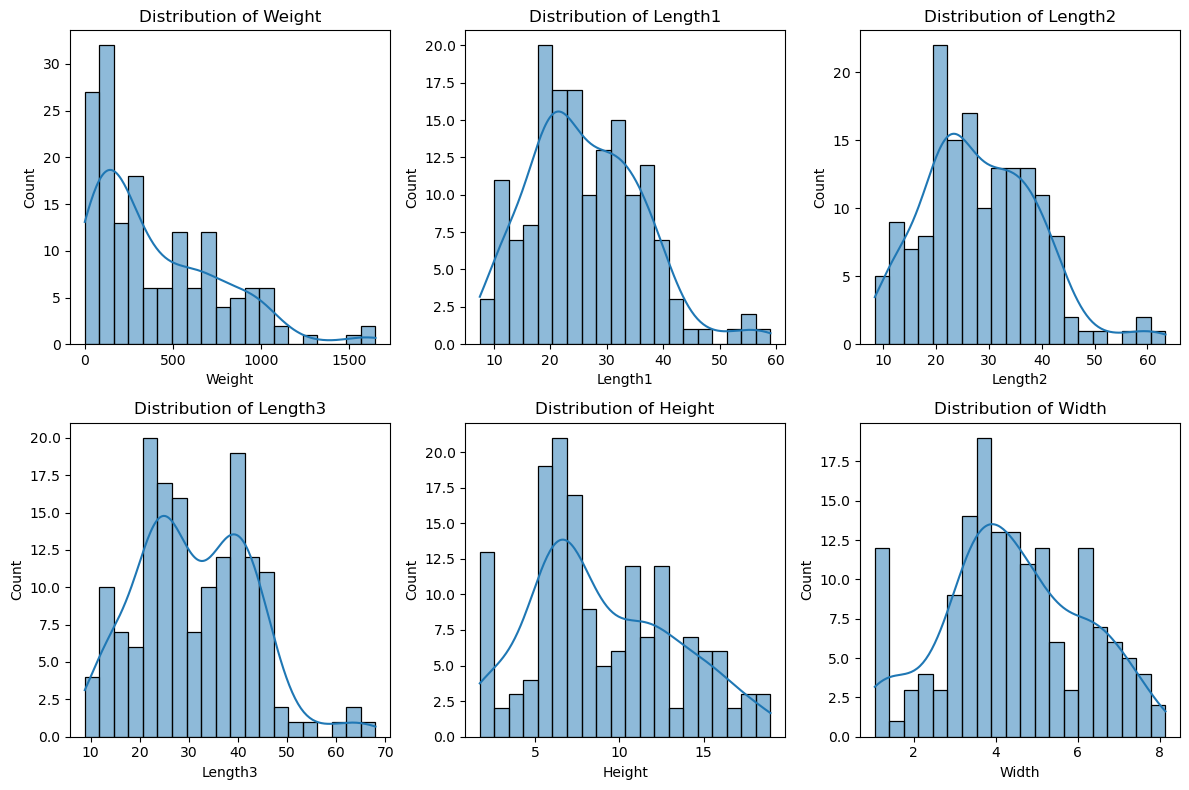

In [60]:
# Distribution of individual features 

plt.figure(figsize=(12, 8))
for i, feature in enumerate(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

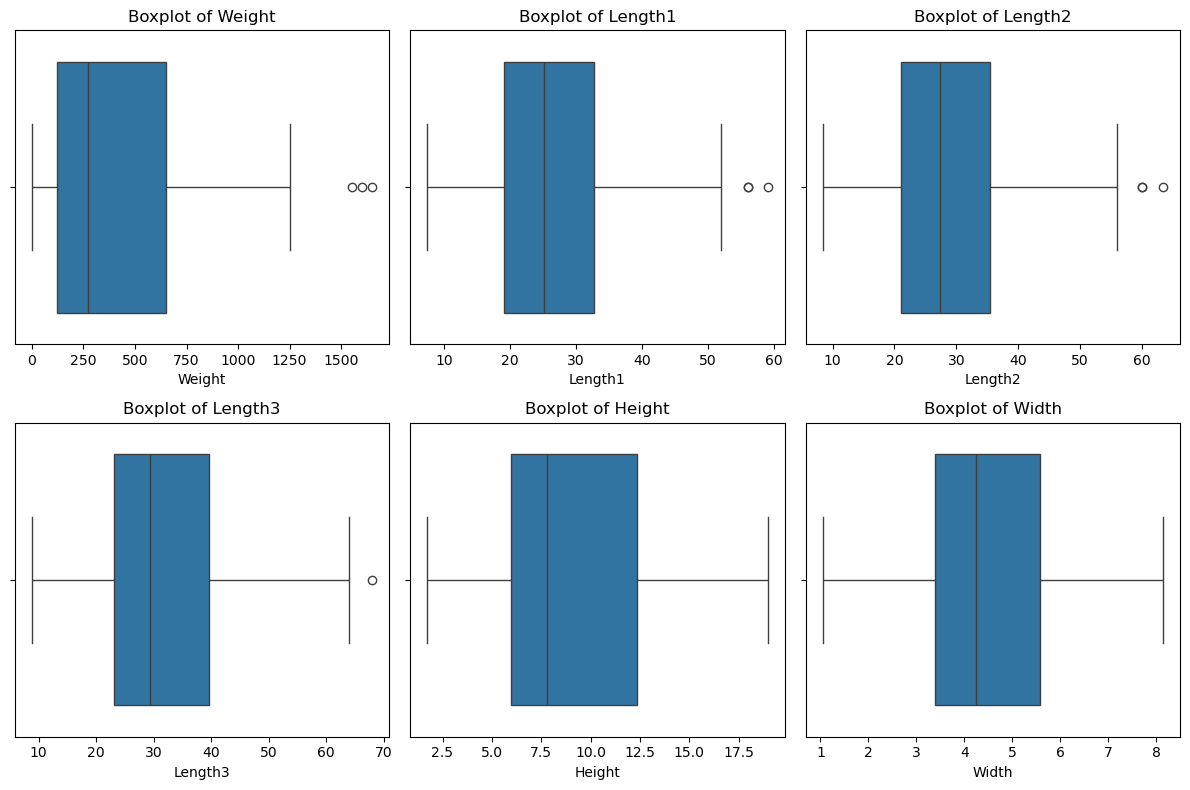

In [62]:
#Box Plot to visualize distribution and outliers for each feature

plt.figure(figsize=(12, 8))
for i, feature in enumerate(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

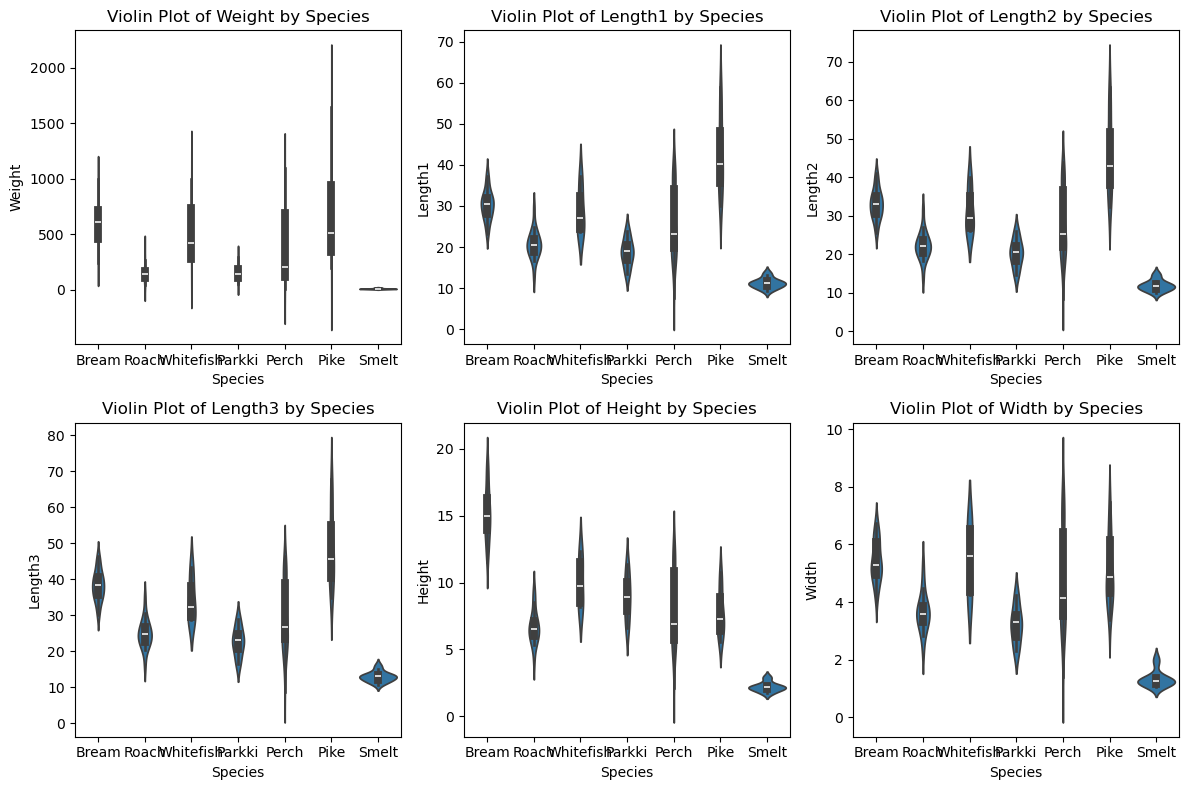

In [88]:
# Violin Plot to compare distributions with respect to species

plt.figure(figsize=(12, 8))
for i, feature in enumerate(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='Species', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} by Species')
plt.tight_layout()
plt.show()

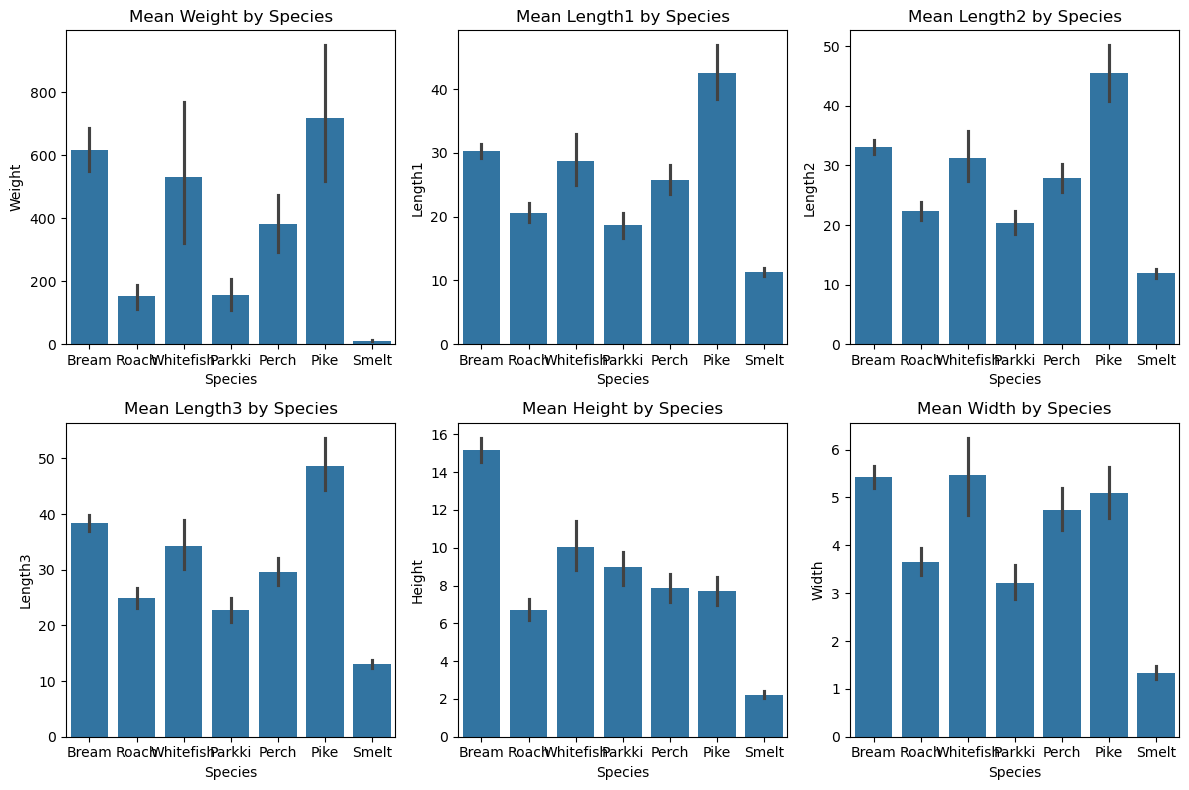

In [90]:
# Bar Plot to show average of features by species

plt.figure(figsize=(12, 8))
for i, feature in enumerate(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Species', y=feature, data=df, estimator='mean')
    plt.title(f'Mean {feature} by Species')
plt.tight_layout()
plt.show()

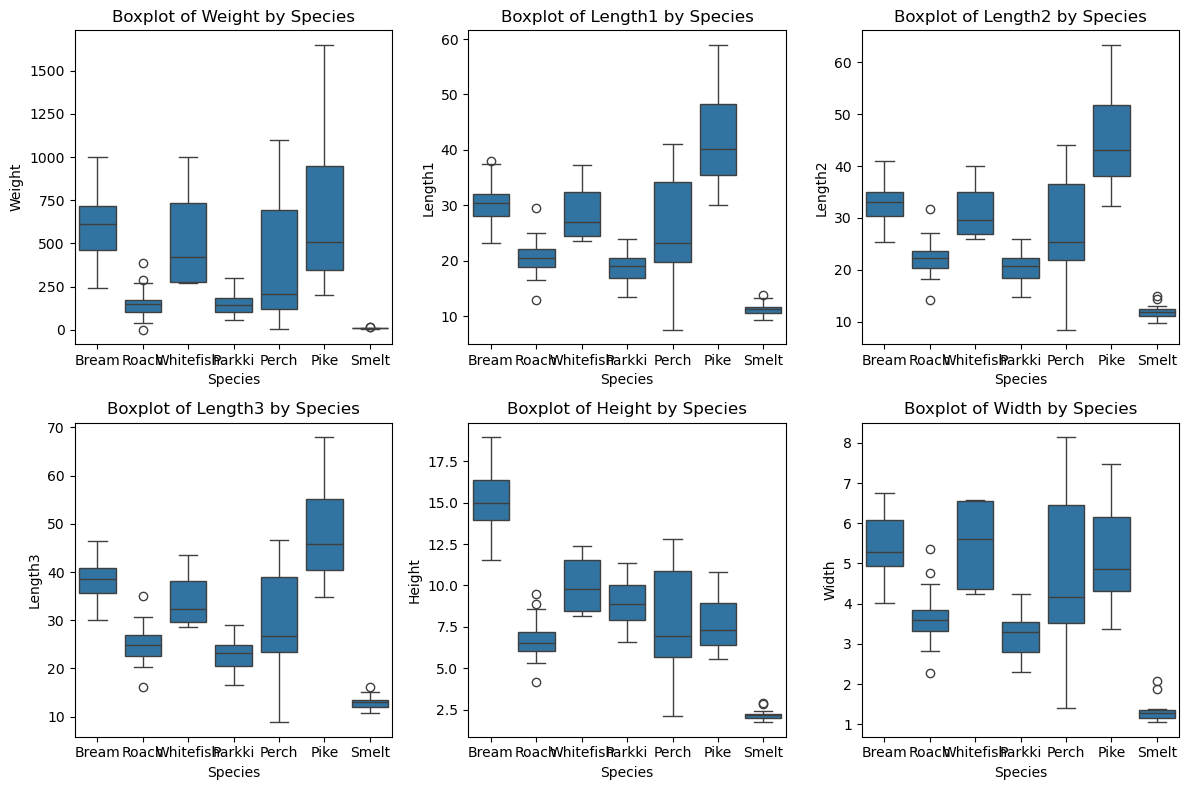

In [92]:
# Visualizing the Differences Between Species

plt.figure(figsize=(12, 8))
for i, feature in enumerate(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Species')
plt.tight_layout()
plt.show()

## Data Preprocessing

In [19]:
df = pd.get_dummies(df, columns=['Species'], drop_first=True)

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(['Weight'], axis=1)  
y = df['Weight'] 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [28]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [30]:
Linear_reg = LinearRegression(),
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()

In [32]:
model_li = [Ride_reg,XGBoost,Random_forest,Ada_boost,Grad_boost,Bagging]

Score =[]
for model in model_li:
    model.fit(X_train,y_train)
    Score.append(r2_score(y_test,model.predict(X_test)))

Score

[0.9475825900971644,
 0.9615995815106632,
 0.9749819137074579,
 0.9621842256575874,
 0.9822172771159292,
 0.9648537657688057]

## Model Evaluation

In [47]:
# R2 score for the  Gradient Boosting Regressor

Grad_boost.fit(X_train,y_train)
print("The R2 score of Random Forest : ",r2_score(y_test,Grad_boost.predict(X_test)))

The R2 score of Random Forest :  0.9827199476455439


In [49]:
# Mean Squared Error (MSE) 

y_pred = Random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Random Forest: ", mse)

Mean Squared Error (MSE) for Random Forest:  3991.03048041645


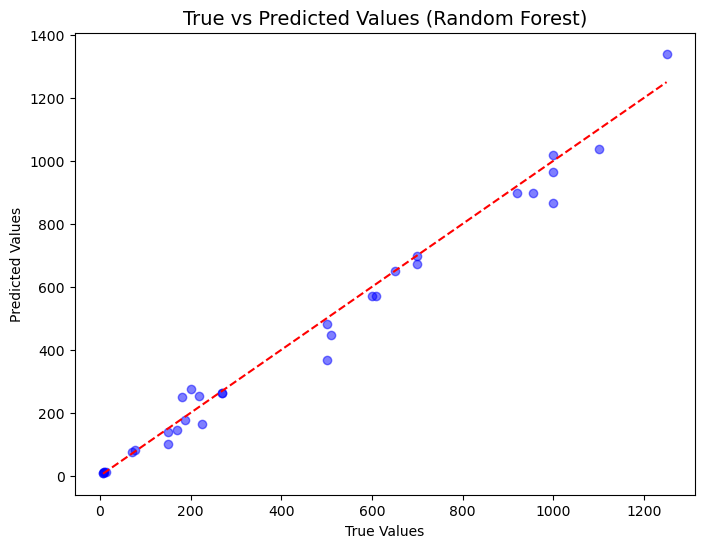

In [51]:
# Plotting True vs Predicted values

y_pred = Grad_boost.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('True vs Predicted Values (Random Forest)', fontsize=14)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()